In [2]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('CompileReviews-8-11-2022.csv')
df.head()

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5.0,5.0,2014,https://www.google.com/maps/contrib/1172180627...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5.0,5.0,2014,https://www.google.com/maps/contrib/1018313073...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
2,Omar Nicolai,I know this building has over 200 years of var...,5.0,5.0,2014,https://www.google.com/maps/contrib/1069724274...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
3,ruth connolly,Great place to sit or exercise. Well kept safe...,5.0,5.0,2014,https://www.google.com/maps/contrib/1090465921...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
4,Fintan Moloney,"Nice college grounds area for walking, jogging...",5.0,5.0,2014,https://www.google.com/maps/contrib/1052988761...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive


In [4]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

In [5]:
df.mean()

reviewRating         3.431928
ratingMaxvalue       5.000000
dateCreated       2016.186186
dtype: float64

### Geometric Mean
The Geometric Mean (GM) is the average value or mean which signifies the central tendency of the set of numbers by finding the product of their values.

In [6]:
from scipy.stats import gmean
print ("Geometric mean of Review Ratings: ",gmean(df['reviewRating']))

Geometric mean of Review Ratings:  nan


### Harmonic Mean
The Harmonic Mean (HM) is defined as the reciprocal of the average of the reciprocals of the data values.
It is based on all the observations, and it is rigidly defined.
Harmonic mean gives less weightage to the large values and large weightage to the small values to balance the values correctly

In [8]:
print ("Harmonic mean of Review Ratings: ",statistics.harmonic_mean(df['reviewRating']))

Harmonic mean of Review Ratings:  nan


### Mode

In [9]:
df.mode()

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
0,Student,"Great team, great people, great campus, good w...",5.0,5.0,2018.0,www.google.com,www.google.com,University of Limerick,University of Limerick,Positive
1,NaN,Really amazing and Beautiful Ã°Å¸ËœÂ Feels li...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Median

In [10]:
print ("Median of OS Review Ratings: ",statistics.median(df['reviewRating']))

Median of OS Review Ratings:  3.8


### Standard Deviation

In [11]:
print ("Standard Deviation of Review Ratings: ",statistics.stdev(df['reviewRating']))

Standard Deviation of Review Ratings:  nan


### Variance

In [12]:
print ("Variance of OS Review Ratings: ",statistics.variance(df['reviewRating']))

Variance of OS Review Ratings:  nan


### Skewness

In [13]:
df.skew()

reviewRating     -0.506594
ratingMaxvalue    0.000000
dateCreated      -0.965297
dtype: float64

### Visualisation of negative skewness

<AxesSubplot: ylabel='Density'>

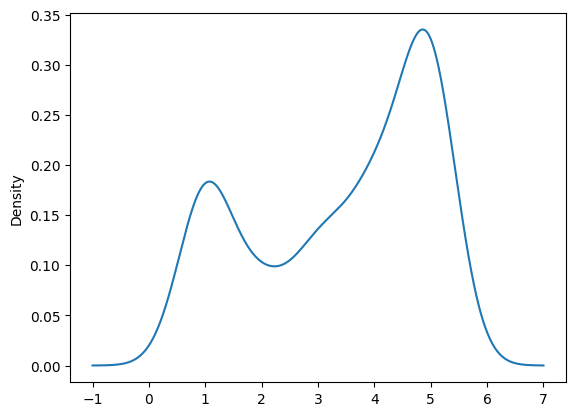

In [14]:
df['reviewRating'].plot(kind = 'density')

### As the skewness of each of the numerical columns is very less (almost negligible), the skewness is not shown properly on the graphs

### Density plot for all numerical values

<AxesSubplot: ylabel='Density'>

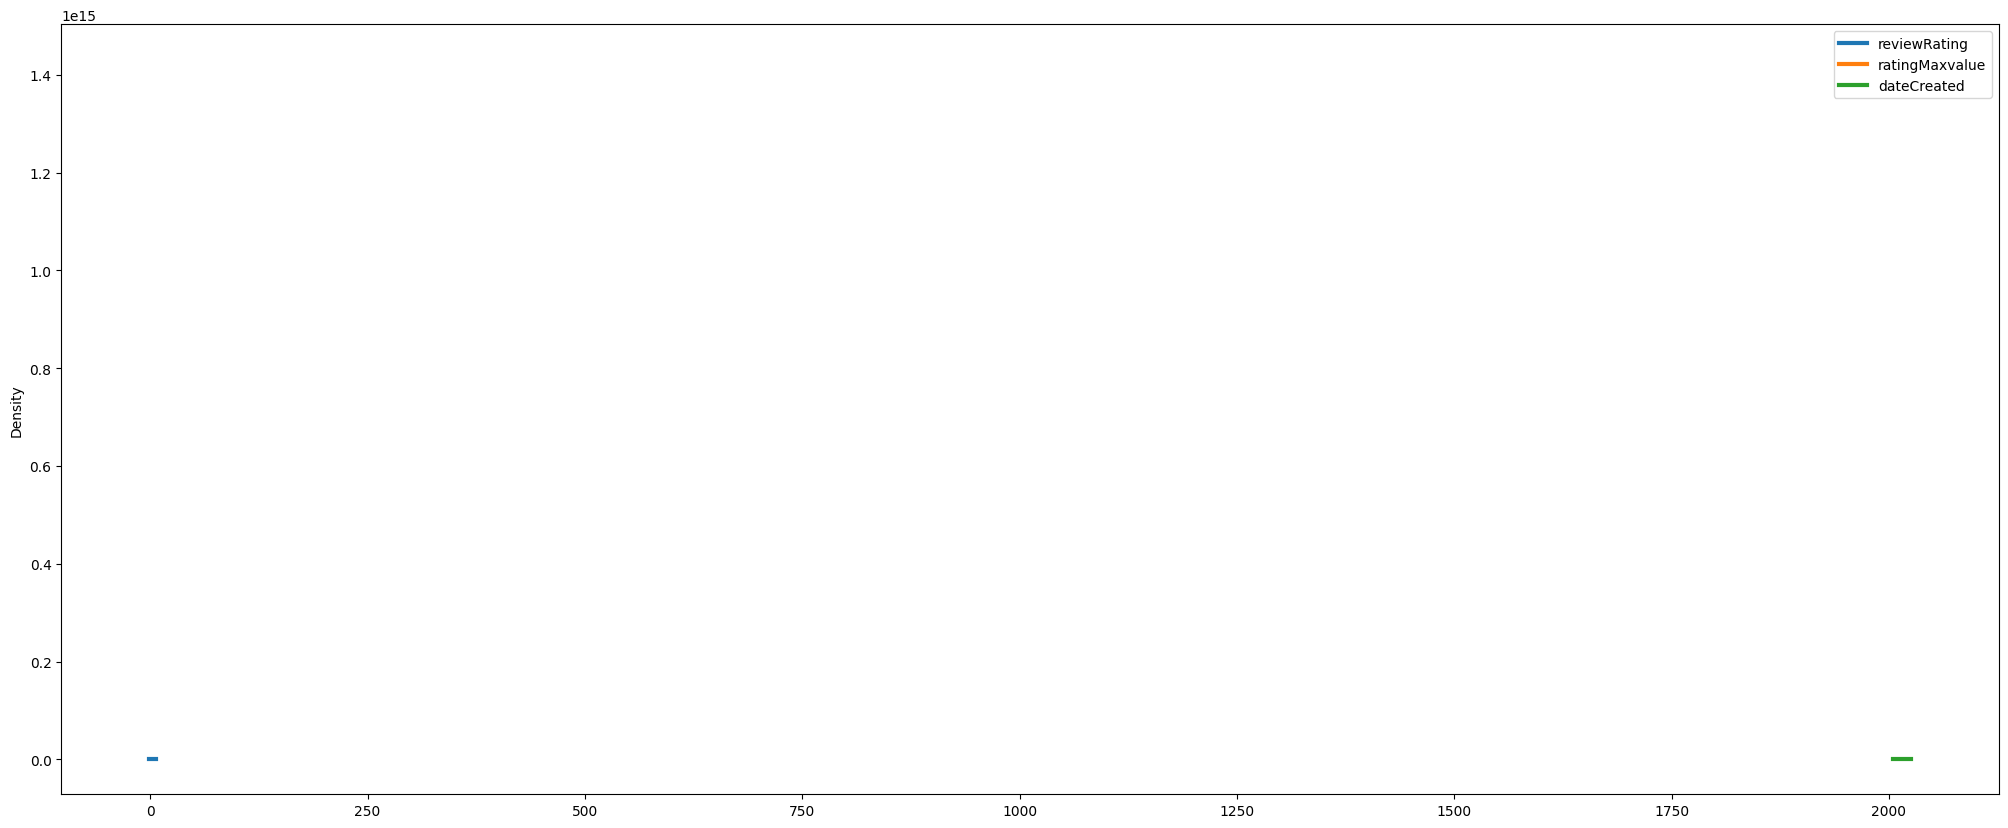

In [15]:
df.plot.density(figsize = (25, 10),linewidth = 3)

### Kurtosis

In [17]:
df.kurt()

reviewRating     -1.289290
ratingMaxvalue    0.000000
dateCreated      -0.069791
dtype: float64

### InterQuartile Ranges

In [18]:
for col in numeric_data.columns:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    print('IQR of %s : %d' %(col,IQR))

IQR of reviewRating : 3
IQR of ratingMaxvalue : 0
IQR of dateCreated : 3


### Mean Absolute Deviation
The mean absolute deviation of a dataset is the average distance between each data point and the mean. It gives us an idea about the variability in a dataset.

In [19]:
df.mad()

reviewRating      1.370877
ratingMaxvalue    0.000000
dateCreated       1.940048
dtype: float64

### Confidence Interval

In [20]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [21]:
print(mean_confidence_interval(df['reviewRating'], confidence=0.95))

(nan, nan, nan)


### Z-Scores

In [22]:
import scipy.stats as stats
z_scores = stats.zscore(numeric_data)
z_scores

,reviewRating,ratingMaxvalue,dateCreated
0,NaN,NaN,-0.912727
1,NaN,NaN,-0.912727
2,NaN,NaN,-0.912727
3,NaN,NaN,-0.912727
4,NaN,NaN,-0.912727
...,...,...,...
328,NaN,NaN,0.339765
329,NaN,NaN,0.757262
330,NaN,NaN,0.757262
331,NaN,NaN,0.339765


<AxesSubplot: >

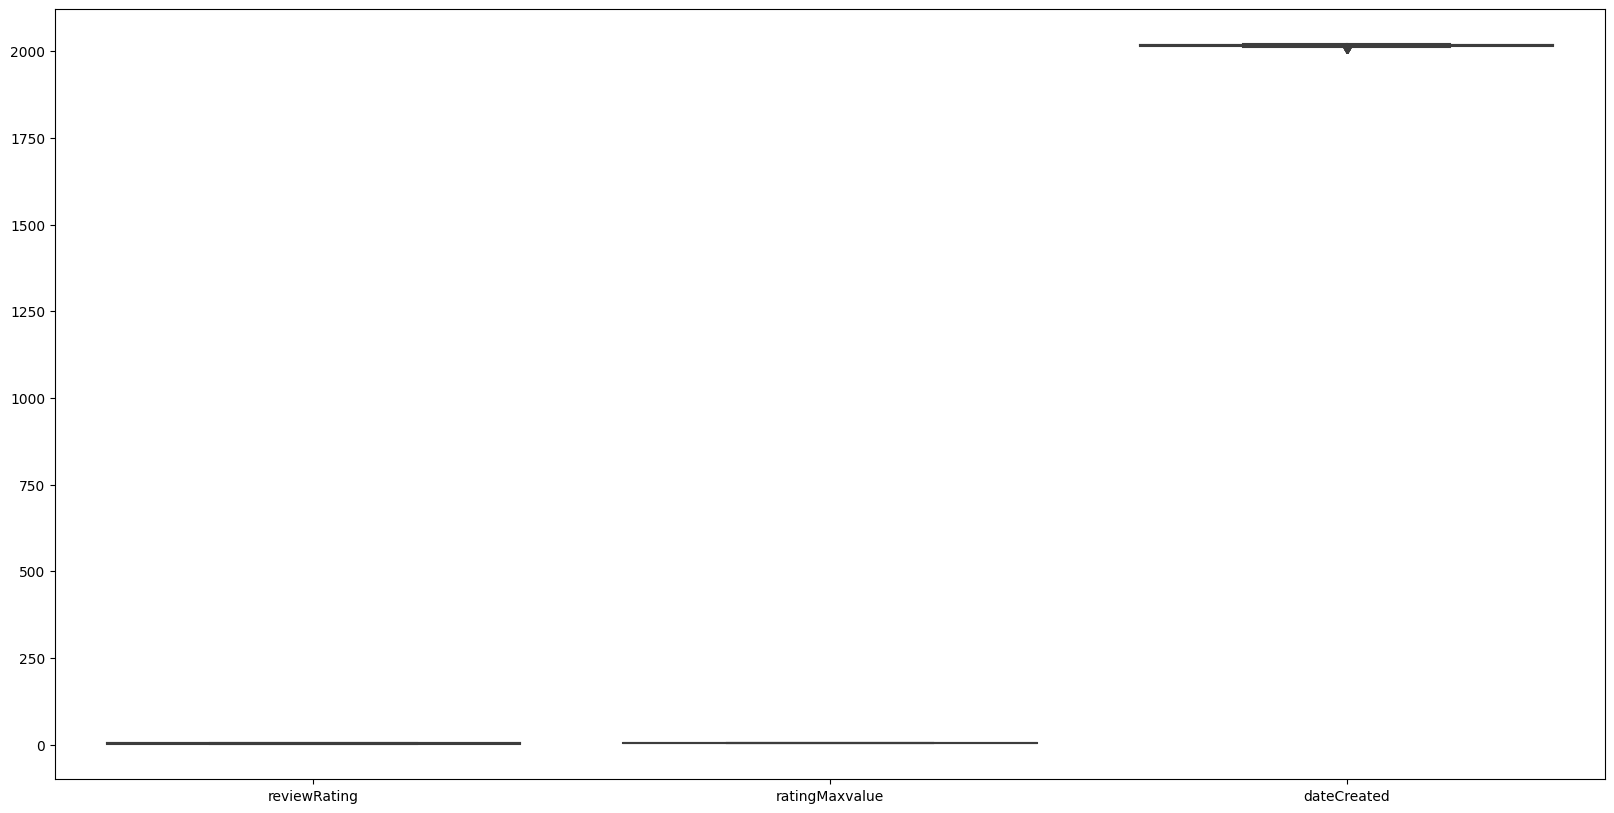

In [23]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df)

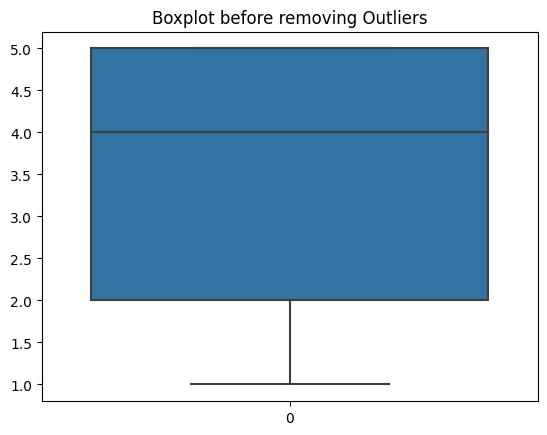

In [24]:
sns.boxplot(df['reviewRating'])
plt.title('Boxplot before removing Outliers')
plt.show()

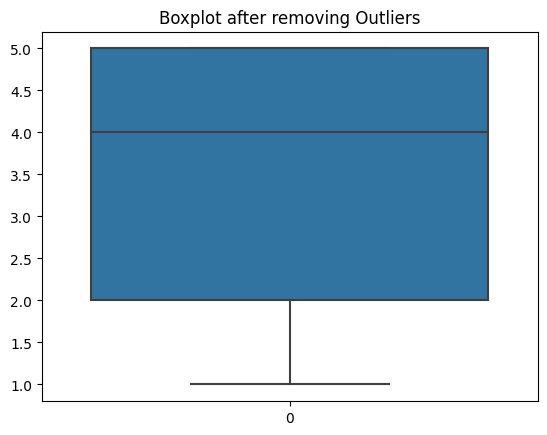

In [26]:
for i in df['reviewRating']:
    q1 = df['reviewRating'].quantile(0.25)
    q3 = df['reviewRating'].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    
    if i>upper_tail or i<lower_tail:
        df['reviewRating'] = df['reviewRating'].replace(i,0)
        
sns.boxplot(df['reviewRating'])
plt.title('Boxplot after removing Outliers')
plt.show()